In [1]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
import numpy as np

In [2]:
def Heston_explicit_bf(kappa, eta, sigma, rho, V0, r, T, dt, S0, I, J, K):
    # setting up the directions and steps
    nt = int(np.ceil(T / dt))

    # lower bounds of s and v are both 0
    sbound = S0 * 1.2
    vbound = V0 * 1.3
    ds = S0 / I # step length of s
    dv = V0 / J # step length of v
    s_points = np.arange(0, sbound + ds, ds)
    v_points = np.arange(0, vbound + dv, dv)
    ns = len(s_points) - 1
    nv = len(v_points) - 1
    i_points = np.arange(ns + 1)
    j_points = np.arange(nv + 1)

    # Payoff of a European call option at maturity
    u_initial = np.maximum(s_points - K, 0).reshape((ns + 1, 1))
    U = np.repeat(u_initial, nv + 1, axis=1)
    U_n = copy.deepcopy(U)

    A, B, C, D, E, F = np.zeros_like(U), np.zeros_like(U), np.zeros_like(U), np.zeros_like(U), np.zeros_like(U), np.zeros_like(U)

    U_time = []
    for x in range(nt):
        for i in range(len(i_points)):
            for j in range(len(j_points)):
                
                A[i][j] = 1 - (np.square(i)* v_points[j] * dt) - (np.square(sigma)*j*dt/dv )- (r*dt)
                B[i][j] = rho*sigma*i*j*dt /4
                C[i][j] = 0.5 * (i**2 * v_points[j] - r*i) *dt
                D[i][j] = 0.5 * (i**2 * v_points[j] + r*i) *dt
                E[i][j] = (sigma**2 *j - kappa*(eta - v_points[j]))*dt / (2*dv)
                F[i][j] = (sigma**2 *j + kappa*(eta - v_points[j]))*dt / (2*dv)

        for i in range(1, len(i_points)-1):
            for j in range(1, len(j_points)-1):
                U_n[i][j] = A[i][j]*U[i][j] + B[i][j]*(U[i-1][j-1] - U[i-1][j+1] - U[i+1][j-1] + U[i+1][j+1]) + C[i][j]*U[i-1][j] + D[i][j]*U[i+1][j] + E[i][j]*U[i][j-1] + F[i][j]*U[i][j+1]

        for j in range(len(j_points)):
            U_n[ns][j] = ( -U_n[ns-2][j] + 4*U_n[ns-1][j] + 2*ds)/3
            U_n[0][j] = 0 # S=0 
        
        for i in range(len(i_points)-1):
            U_n[i][nv] = s_points[i]
            P = 1 - r*dt - r*i*dt - ((3*kappa*eta*dt)/(2*dv))
            Q = r*i*dt
            R = kappa*eta*dt / (2*dv)

            U_n[i][0] = P*U[i][0] + Q*U[i+1][0] + R*(4*U[i][1] - U[i][2])
        
        U = copy.deepcopy(U_n)
        U_time.append(copy.deepcopy(U))
        if (x%100 == 0): print("100 steps donee", end="   ")

    
    U = U[0:I + 1, 0:J + 1]

    return U, U_time


In [3]:
U_space,_ = Heston_explicit_bf(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   

In [4]:
U_space

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.71524547e-06, 5.04300966e-06, 1.08561451e-05, 2.08919256e-05,
        3.66391780e-05, 5.99675477e-05, 9.29642499e-05, 1.37937930e-04,
        1.97398145e-04, 2.74034506e-04, 3.70695371e-04, 4.90366437e-04,
        6.36149578e-04, 8.11242266e-04, 1.01891777e-03, 1.26250599e-03,
        1.54537319e-03, 1.87089513e-03, 2.24244407e-03, 2.66386363e-03,
        3.14540809e-03],
       [3.63841481e-05, 9.80630789e-05, 2.01452793e-04, 3.71143303e-04,
        6.25581766e-04, 9.86641708e-04, 1.47687709e-03, 2.11936565e-03,
        2.93731286e-03, 3.95370486e-03, 5.19101327e-03, 6.67094912e-03,
        8.4142

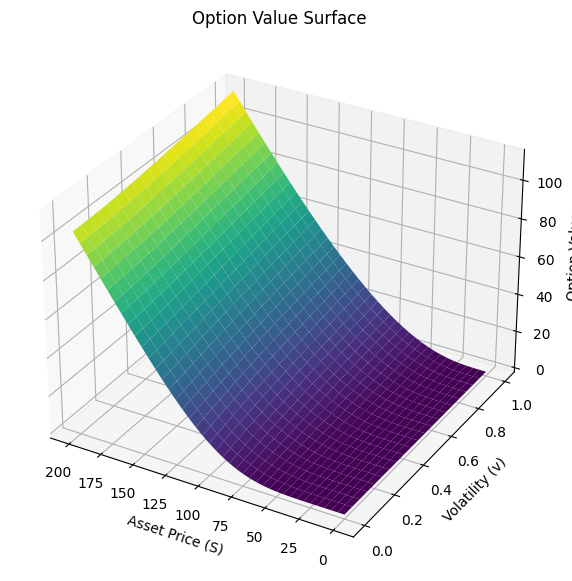

In [5]:
# trying to plot 
V0=1; S0=200; I=40; J=20
S = np.linspace(0, S0, I+1)
v = np.linspace(0, V0, J+1)
S, v = np.meshgrid(S, v)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S, v, U_space.T, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_xlabel('Asset Price (S)')
ax.set_ylabel('Volatility (v)')
ax.set_zlabel('Option Value')

# Title
ax.set_title('Option Value Surface')
plt.show()
# plt.savefig('option-surface-init.png', dpi = 300)

trying for greeks

In [12]:
def Heston_explicit_bf_del(kappa, eta, sigma, rho, V0, r, T, dt, S0, I, J, K, type1='price'):
    # setting up the directions and steps
    nt = int(np.ceil(T / dt))

    # lower bounds of s and v are both 0
    sbound = S0 * 1.2
    vbound = V0 * 1.3
    ds = S0 / I # step length of s
    dv = V0 / J # step length of v
    s_points = np.arange(0, sbound + ds, ds)
    v_points = np.arange(0, vbound + dv, dv)
    ns = len(s_points) - 1
    nv = len(v_points) - 1
    i_points = np.arange(ns + 1)
    j_points = np.arange(nv + 1)

    # Payoff of a European call option at maturity
    u_initial = np.maximum(s_points - K, 0).reshape((ns + 1, 1))
    U = np.repeat(u_initial, nv + 1, axis=1)
    U_n = copy.deepcopy(U)

    A, B, C, D, E, F = np.zeros_like(U), np.zeros_like(U), np.zeros_like(U), np.zeros_like(U), np.zeros_like(U), np.zeros_like(U)

    U_time = []
    for x in range(nt):
        for i in range(len(i_points)):
            for j in range(len(j_points)):
                
                A[i][j] = 1 - (np.square(i)* v_points[j] * dt) - (np.square(sigma)*j*dt/dv )- (r*dt)
                B[i][j] = rho*sigma*i*j*dt /4
                C[i][j] = 0.5 * (i**2 * v_points[j] - r*i) *dt
                D[i][j] = 0.5 * (i**2 * v_points[j] + r*i) *dt
                E[i][j] = (sigma**2 *j - kappa*(eta - v_points[j]))*dt / (2*dv)
                F[i][j] = (sigma**2 *j + kappa*(eta - v_points[j]))*dt / (2*dv)

        for i in range(1, len(i_points)-1):
            for j in range(1, len(j_points)-1):
                U_n[i][j] = A[i][j]*U[i][j] + B[i][j]*(U[i-1][j-1] - U[i-1][j+1] - U[i+1][j-1] + U[i+1][j+1]) + C[i][j]*U[i-1][j] + D[i][j]*U[i+1][j] + E[i][j]*U[i][j-1] + F[i][j]*U[i][j+1]

        for j in range(len(j_points)):
            U_n[ns][j] = ( -U_n[ns-2][j] + 4*U_n[ns-1][j] + 2*ds)/3
            U_n[0][j] = 0 # S=0 
        
        for i in range(len(i_points)-1):
            U_n[i][nv] = s_points[i]
            P = 1 - r*dt - r*i*dt - ((3*kappa*eta*dt)/(2*dv))
            Q = r*i*dt
            R = kappa*eta*dt / (2*dv)

            U_n[i][0] = P*U[i][0] + Q*U[i+1][0] + R*(4*U[i][1] - U[i][2])
        
        U = copy.deepcopy(U_n)
        U_time.append(copy.deepcopy(U))
        if (x%100 == 0): print("100 steps donee", end="   ")

    print("\n",U.shape)
    if type1 == 'price':
        U = U[0:I + 1, 0:J + 1]
    
    elif type1 == 'delta':  # delta
        U[0, 0:J+1] = (U[1, 0:J+1] - U[0, 0:J+1]) / ds
        U[1:I+1, 0:J+1] = (U[2:I+2, 0:J+1] - U[0:I, 0:J+1]) / (2 * ds)
        U = U[0:I + 1, 0:J + 1]
    
    elif type1 == 'gamma':  # gamma
        U[0, 0:J+1] = U[1, 0:J+1] / (ds ** 2)
        U[1:I+1, 0:J+1] = (U[2:I+2, 0:J+1] - 2 * U[1:I+1, 0:J+1] + U[0:I, 0:J+1]) / (ds ** 2)
        U = U[0:I + 1, 0:J + 1]
    
    elif type1 == 'vega':  # vega
        U[0:I+1, 0] = (U[0:I+1, 1] - U[0:I+1, 0]) / dv
        U[0:I+1, 1:J+1] = (U[0:I+1, 2:J+2] - U[0:I+1, 0:J]) / (2 * dv)
        U = U[0:I + 1, 0:J + 1]

    return U, U_time


In [14]:
# U_space,_ = Heston_explicit_bf_del(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100, type1='price')

In [15]:
# U_space.shape

In [16]:
# ds = S0 / I
# U_space[0, 0:J+1] = (U_space[1, 0:J+1] - U_space[0, 0:J+1]) / ds

In [17]:
# U_space.shape

In [18]:
# U_space[1:I+1, 0:J+1] = (U_space[2:I+2, 0:J+1] - U_space[0:I, 0:J+1]) / (2 * ds)

In [19]:
# U_space.shape

In [20]:
# U = U_space[0:I + 1, 0:J + 1]
# U.shape

In [21]:
U_space_delta,_ = Heston_explicit_bf_del(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100, type1='delta')

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   
 (49, 27)


In [22]:
U_space_delta.shape

(41, 21)

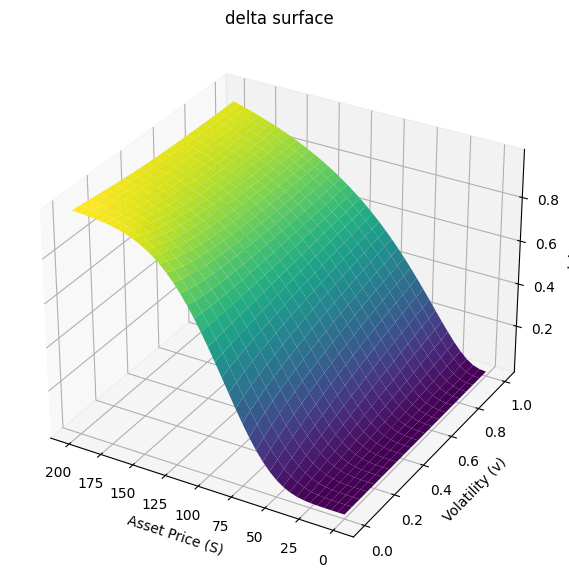

In [23]:
# trying to plot 
V0=1; S0=200; I=40; J=20
S = np.linspace(0, S0, I+1)
v = np.linspace(0, V0, J+1)
S, v = np.meshgrid(S, v)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S, v, U_space_delta.T, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_xlabel('Asset Price (S)')
ax.set_ylabel('Volatility (v)')
ax.set_zlabel('delta')

# Title
ax.set_title('delta surface')
plt.show()
# plt.savefig('option-surface-init.png', dpi = 300)

In [24]:
U_space_gamma,_ = Heston_explicit_bf_del(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100, type1='gamma')

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   
 (49, 27)


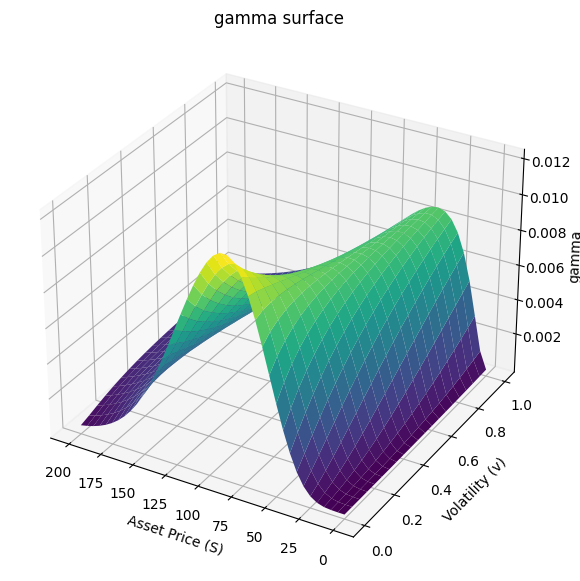

In [25]:
# trying to plot 
V0=1; S0=200; I=40; J=20
S = np.linspace(0, S0, I+1)
v = np.linspace(0, V0, J+1)
S, v = np.meshgrid(S, v)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S, v, U_space_gamma.T, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_xlabel('Asset Price (S)')
ax.set_ylabel('Volatility (v)')
ax.set_zlabel('gamma')

# Title
ax.set_title('gamma surface')
plt.show()
# plt.savefig('option-surface-init.png', dpi = 300)

In [26]:
U_space_vega,_ = Heston_explicit_bf_del(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/5000, S0=200, I=40, J=20, K=100, type1='vega')

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   
 (49, 27)


Vega is not working !!!

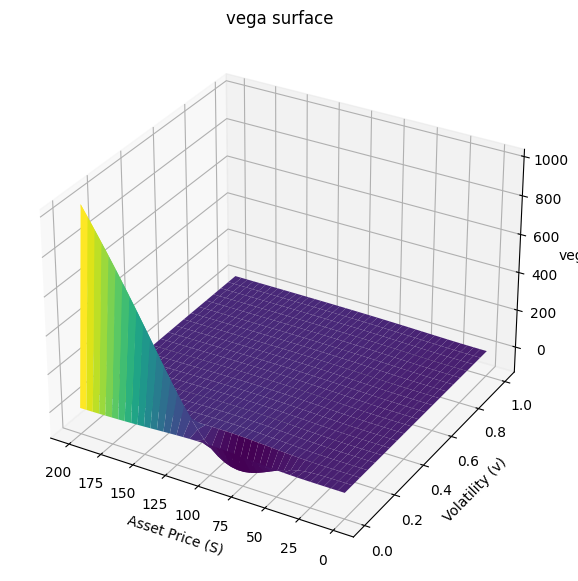

In [27]:
# trying to plot 
V0=1; S0=200; I=40; J=20
S = np.linspace(0, S0, I+1)
v = np.linspace(0, V0, J+1)
S, v = np.meshgrid(S, v)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S, v, U_space_vega.T, cmap='viridis')
ax.invert_xaxis()

# Labels
ax.set_xlabel('Asset Price (S)')
ax.set_ylabel('Volatility (v)')
ax.set_zlabel('vega')

# Title
ax.set_title('vega surface')
plt.show()
# plt.savefig('option-surface-init.png', dpi = 300)